In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [255]:
mnist = fetch_openml('mnist_784', version=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [256]:
X, y = mnist['data'], mnist['target']
y = y.astype(int)

In [257]:
X.shape

(70000, 784)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [259]:
X_train_std.mean(), X_train_std.std()

(9.417243698257367e-19, 0.9529760045804524)

In [260]:
X_test_std = sc.transform(X_test)

In [261]:
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [262]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([ 4.07295839e+01,  2.90418608e+01,  2.68587430e+01,  2.07587594e+01,
        1.81148698e+01,  1.58514938e+01,  1.37505637e+01,  1.25815028e+01,
        1.10841119e+01,  1.00094093e+01,  9.61008970e+00,  8.66686885e+00,
        8.05430833e+00,  7.84686819e+00,  7.37479467e+00,  7.16583773e+00,
        6.70727615e+00,  6.60747405e+00,  6.40113777e+00,  6.18956219e+00,
        5.92724093e+00,  5.75790506e+00,  5.49525496e+00,  5.32966083e+00,
        5.14858604e+00,  4.95671703e+00,  4.92926425e+00,  4.73645210e+00,
        4.53482375e+00,  4.42766970e+00,  4.33320032e+00,  4.27804787e+00,
        4.11366660e+00,  4.10473637e+00,  4.00225547e+00,  3.89572057e+00,
        3.81322093e+00,  3.73452888e+00,  3.69730886e+00,  3.63026141e+00,
        3.43384430e+00,  3.40127629e+00,  3.33391272e+00,  3.22632738e+00,
        3.25161428e+00,  3.19428050e+00,  3.16871022e+00,  3.11740610e+00,
        3.06433666e+00,  3.01285190e+00,  2.96582869e+00,  2.90267883e+00,
        2.88262968e+00,  

In [263]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.0572033043974039,
 0.040788297914938654,
 0.03772218385914345,
 0.029154965987000327,
 0.02544171357167065,
 0.02226287967313566,
 0.019312195282824844,
 0.017670289360984064,
 0.015567255133344858,
 0.014057872289175325,
 0.013497041532429184,
 0.01217232019529042,
 0.011311999932673166,
 0.011020657370434674,
 0.010357646303807897,
 0.010064173435069637,
 0.009420139422517494,
 0.009279970790448904,
 0.008990178557896899,
 0.008693027913584193,
 0.008324606694762223,
 0.008086780263837547,
 0.0077178972060444094,
 0.007485325928584982,
 0.007231012589500461,
 0.006961539153110452,
 0.006922982661201509,
 0.006652184601733977,
 0.00636900449749861,
 0.006218510302202456,
 0.006085831306259787,
 0.0060083715702804255,
 0.0057775037193534265,
 0.00576496151341201,
 0.005621030608345336,
 0.005471405987930515,
 0.00535553807795943,
 0.005245017794853626,
 0.0051927435517249605,
 0.005098577695432916,
 0.004822716596933478,
 0.004776975946841724,
 0.0046823661223276665,
 0.004566780786

In [264]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.0572033 , 0.0979916 , 0.13571379, 0.16486875, 0.19031047,
       0.21257335, 0.23188554, 0.24955583, 0.26512309, 0.27918096,
       0.292678  , 0.30485032, 0.31616232, 0.32718298, 0.33754062,
       0.3476048 , 0.35702494, 0.36630491, 0.37529509, 0.38398811,
       0.39231272, 0.4003995 , 0.4081174 , 0.41560272, 0.42283374,
       0.42979527, 0.43671826, 0.44337044, 0.44973945, 0.45595796,
       0.46204379, 0.46805216, 0.47382966, 0.47959462, 0.48521566,
       0.49068706, 0.4960426 , 0.50128762, 0.50648036, 0.51157894,
       0.51640166, 0.52117863, 0.525861  , 0.53042778, 0.53495904,
       0.5394453 , 0.54389565, 0.54827394, 0.55257769, 0.55680914,
       0.56097454, 0.56505126, 0.56909981, 0.57310593, 0.57702319,
       0.58090289, 0.58469863, 0.58840649, 0.59204843, 0.59565487,
       0.59919807, 0.60268568, 0.60614965, 0.60958661, 0.61300676,
       0.61641087, 0.61970822, 0.62294248, 0.62613507, 0.62931088,
       0.6324625 , 0.63559319, 0.63869837, 0.64174443, 0.64476

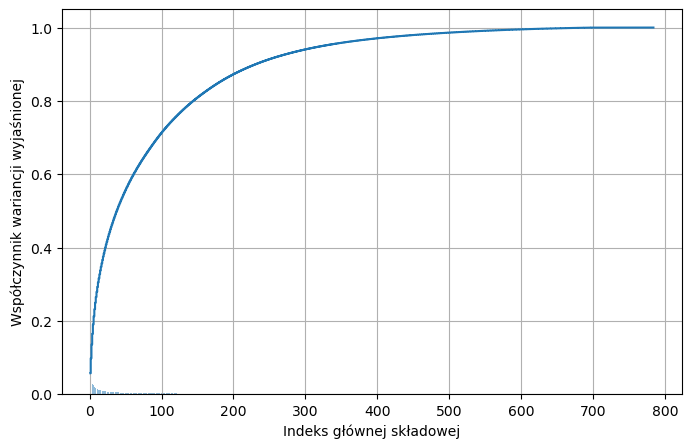

In [265]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid')
plt.xlabel('Indeks głównej składowej')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.grid(True)
plt.show()

Jako, że wykres przy tej ilości danych jest nieczytelny, postanowiłem wyświetlić jego część.

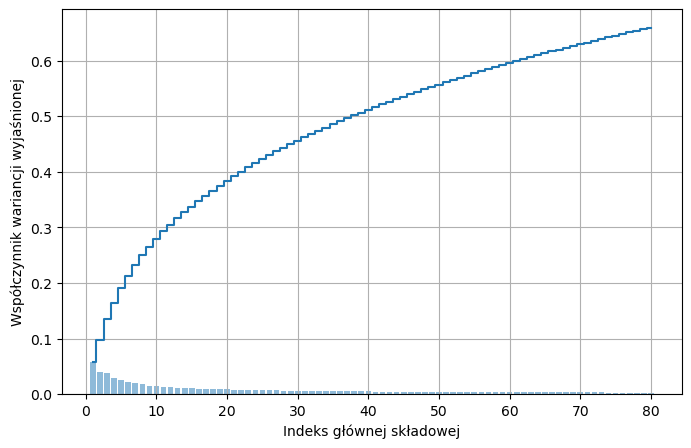

In [266]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 81), var_exp[:80], alpha=0.5, align='center')
plt.step(range(1, 81), cum_var_exp[:80], where='mid')
plt.xlabel('Indeks głównej składowej')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.grid(True)
plt.show()

50 pierwszych składowych głównych odpowiada za ponad 55% wariancji wyjaśnionej. A dokładnie:

In [267]:
sum(var_exp[:50])

0.5568091396209655

In [268]:
pca = PCA(n_components=50)
pca.fit(X_train)

PCA(n_components=50)

In [269]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [270]:
X_train_reconstructed = pca.inverse_transform(X_train_pca)

Wizualizacja zrekonstruowanych danych treningowych

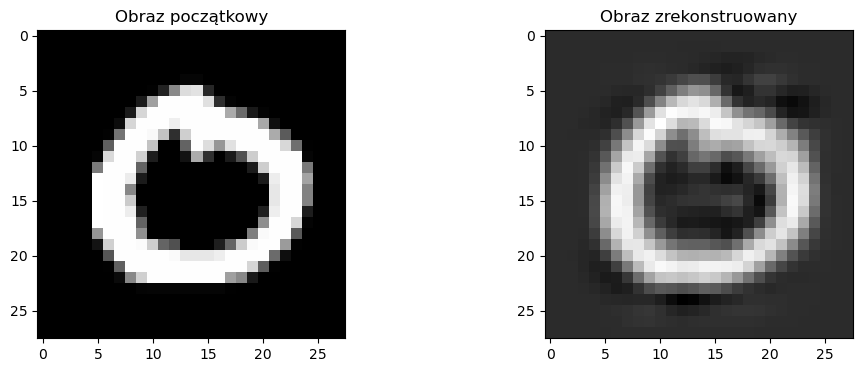

In [271]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title('Obraz początkowy')
plt.subplot(1, 2, 2)
plt.imshow(X_train_reconstructed[0].reshape(28, 28), cmap='gray')
plt.title('Obraz zrekonstruowany')
plt.show()

In [272]:
pipeline_without_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_with_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [273]:
pipeline_without_pca.fit(X_train, y_train)
y_pred_without_pca = pipeline_without_pca.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)

In [274]:
pipeline_with_pca.fit(X_train, y_train)
y_pred_with_pca = pipeline_with_pca.predict(X_test)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

In [275]:
print(f'Dokładność z PCA: {accuracy_without_pca:.4f}')
print(f'Dokładność bez PCA: {accuracy_with_pca:.4f}')

Dokładność z PCA: 0.9118
Dokładność bez PCA: 0.9005


Wizualizacja zrekonstruowanych danych testowych

In [276]:
X_test_reconstructed = pca.inverse_transform(X_test_pca)

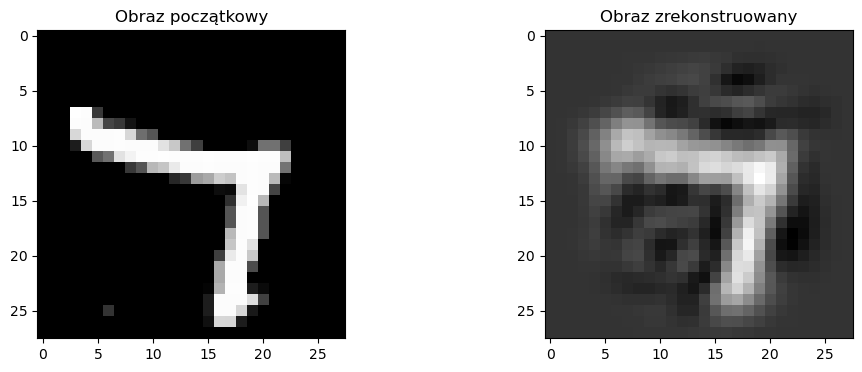

In [277]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_test.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title('Obraz początkowy')
plt.subplot(1, 2, 2)
plt.imshow(X_test_reconstructed[0].reshape(28, 28), cmap='gray')
plt.title('Obraz zrekonstruowany')
plt.show()